EVALUACION DEL MODELO XGBOOST

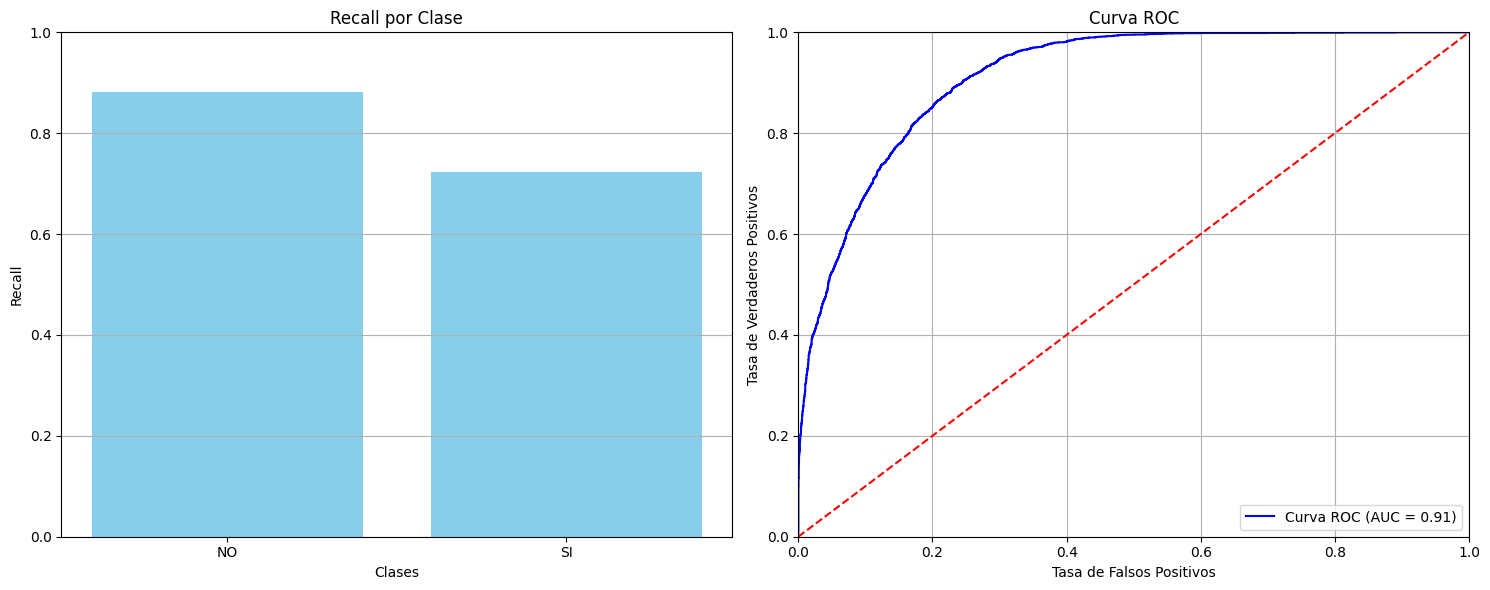

Precisión: 0.83
Reporte de Clasificación:
              precision    recall  f1-score   support

          NO       0.86      0.88      0.87      5880
          SI       0.75      0.72      0.74      2944

    accuracy                           0.83      8824
   macro avg       0.81      0.80      0.81      8824
weighted avg       0.83      0.83      0.83      8824



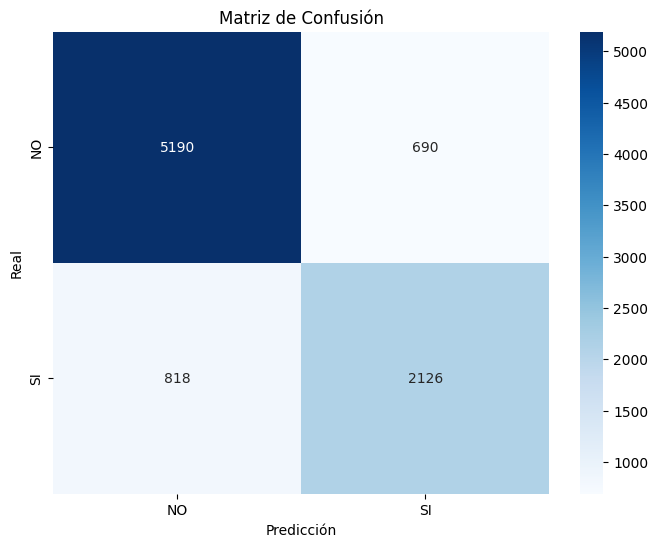

In [4]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos CSV de entrenamiento
df_train = pd.read_csv('cars_cleaned.csv', delimiter=',')
df_train = df_train.drop(columns=['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'EDAD_COCHE', 'Tiempo'])

# Imputar valores faltantes si es necesario
df_train.fillna("Missing", inplace=True)

# Identificar columnas categóricas
categorical_columns = df_train.select_dtypes(include=['object']).columns

# Convertir columnas categóricas a numéricas usando LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

# Separar las características (X) y la variable objetivo (y) en el conjunto de entrenamiento
X = df_train.drop(columns=['Mas_1_coche'])
y = df_train['Mas_1_coche']

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost
model = xgb.XGBClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_val_pred = model.predict(X_val)

# Calcular probabilidades para la curva ROC
y_val_proba = model.predict_proba(X_val)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# Calcular Recall para cada clase
recall_per_class = recall_score(y_val, y_val_pred, average=None)

# Calcular precisión del modelo
accuracy = accuracy_score(y_val, y_val_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Graficar Recall y la curva ROC
plt.figure(figsize=(15, 6))

# Gráfico de Recall
plt.subplot(1, 2, 1)
plt.bar(range(len(recall_per_class)), recall_per_class, color='skyblue')
plt.xticks(range(len(recall_per_class)), label_encoder.classes_)
plt.xlabel('Clases')
plt.ylabel('Recall')
plt.title('Recall por Clase')
plt.ylim([0, 1])
plt.grid(axis='y')

# Gráfico de la curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.show()

# Mostrar resultados
print(f"Precisión: {accuracy:.2f}")
class_report = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_)
print("Reporte de Clasificación:")
print(class_report)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


Puntajes de validación cruzada: [0.81844968 0.8193563  0.82366274 0.81822303 0.82579621]
Precisión media: 0.82 ± 0.00


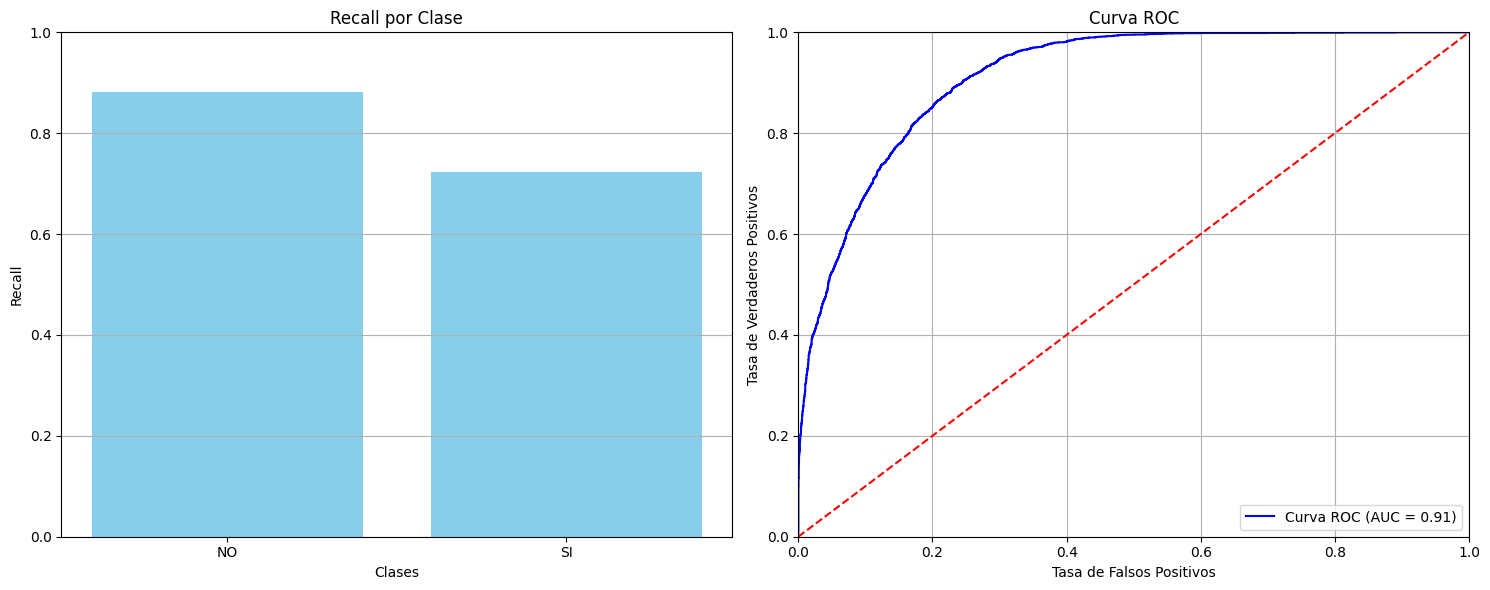

Precisión: 0.83
Reporte de Clasificación:
              precision    recall  f1-score   support

          NO       0.86      0.88      0.87      5880
          SI       0.75      0.72      0.74      2944

    accuracy                           0.83      8824
   macro avg       0.81      0.80      0.81      8824
weighted avg       0.83      0.83      0.83      8824



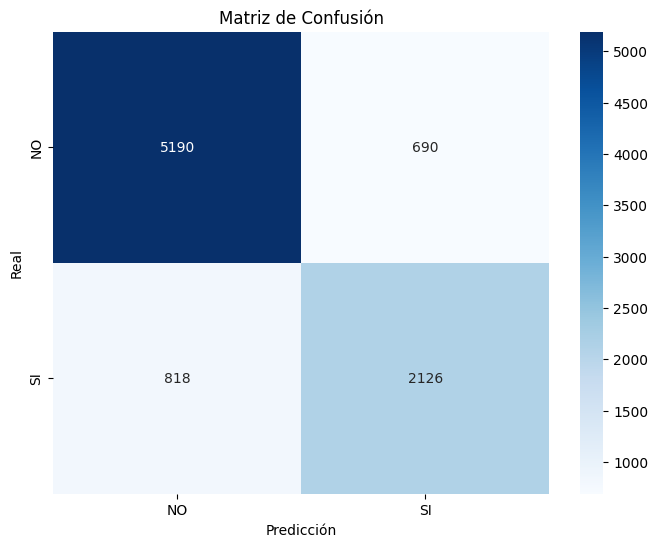

In [6]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos CSV de entrenamiento
df_train = pd.read_csv('cars_cleaned.csv', delimiter=',')
df_train = df_train.drop(columns=['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'EDAD_COCHE', 'Tiempo'])

# Imputar valores faltantes si es necesario
df_train.fillna("Missing", inplace=True)

# Identificar columnas categóricas
categorical_columns = df_train.select_dtypes(include=['object']).columns

# Convertir columnas categóricas a numéricas usando LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

# Separar las características (X) y la variable objetivo (y) en el conjunto de entrenamiento
X = df_train.drop(columns=['Mas_1_coche'])
y = df_train['Mas_1_coche']

# Crear el modelo XGBoost
model = xgb.XGBClassifier()

# Realizar validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Cambia 'cv' al número de pliegues que desees

# Imprimir resultados de la validación cruzada
print(f"Puntajes de validación cruzada: {cv_scores}")
print(f"Precisión media: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_val_pred = model.predict(X_val)

# Calcular probabilidades para la curva ROC
y_val_proba = model.predict_proba(X_val)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# Calcular Recall para cada clase
recall_per_class = recall_score(y_val, y_val_pred, average=None)

# Calcular precisión del modelo
accuracy = accuracy_score(y_val, y_val_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Graficar Recall y la curva ROC
plt.figure(figsize=(15, 6))

# Gráfico de Recall
plt.subplot(1, 2, 1)
plt.bar(range(len(recall_per_class)), recall_per_class, color='skyblue')
plt.xticks(range(len(recall_per_class)), label_encoder.classes_)
plt.xlabel('Clases')
plt.ylabel('Recall')
plt.title('Recall por Clase')
plt.ylim([0, 1])
plt.grid(axis='y')

# Gráfico de la curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.show()

# Mostrar resultados
print(f"Precisión: {accuracy:.2f}")
class_report = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_)
print("Reporte de Clasificación:")
print(class_report)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


Puntajes de validación cruzada: [0.81844968 0.8193563  0.82366274 0.81822303 0.82579621]
Precisión media: 0.82 ± 0.00


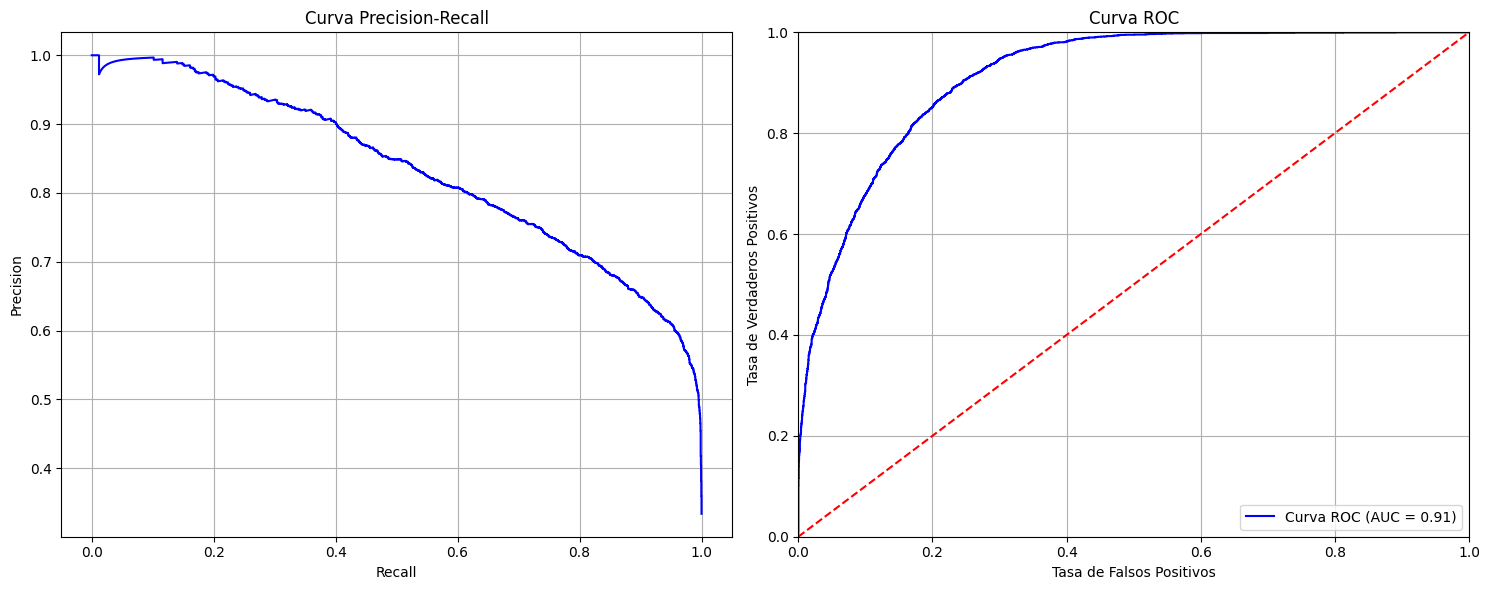

Precisión: 0.83
Reporte de Clasificación:
              precision    recall  f1-score   support

          NO       0.86      0.88      0.87      5880
          SI       0.75      0.72      0.74      2944

    accuracy                           0.83      8824
   macro avg       0.81      0.80      0.81      8824
weighted avg       0.83      0.83      0.83      8824



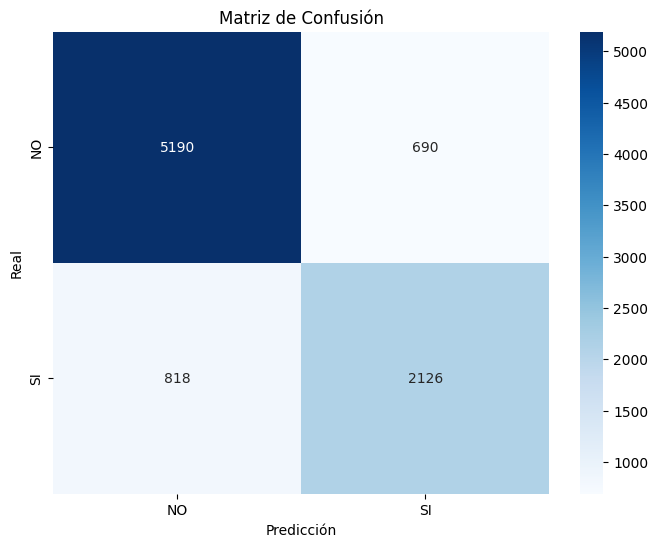

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    precision_recall_curve, 
    recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos CSV de entrenamiento
df_train = pd.read_csv('cars_cleaned.csv', delimiter=',')
df_train = df_train.drop(columns=['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'EDAD_COCHE', 'Tiempo'])

# Imputar valores faltantes si es necesario
df_train.fillna("Missing", inplace=True)

# Identificar columnas categóricas
categorical_columns = df_train.select_dtypes(include=['object']).columns

# Convertir columnas categóricas a numéricas usando LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

# Separar las características (X) y la variable objetivo (y) en el conjunto de entrenamiento
X = df_train.drop(columns=['Mas_1_coche'])
y = df_train['Mas_1_coche']

# Crear el modelo XGBoost
model = xgb.XGBClassifier()

# Realizar validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Imprimir resultados de la validación cruzada
print(f"Puntajes de validación cruzada: {cv_scores}")
print(f"Precisión media: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_val_pred = model.predict(X_val)

# Calcular probabilidades para la curva ROC
y_val_proba = model.predict_proba(X_val)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# Calcular la curva de Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)

# Calcular precisión del modelo
accuracy = accuracy_score(y_val, y_val_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Graficar la curva de Recall y la curva ROC
plt.figure(figsize=(15, 6))

# Gráfico de la curva de Recall (Precision-Recall)
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue', label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)

# Gráfico de la curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.show()

# Mostrar resultados
print(f"Precisión: {accuracy:.2f}")
class_report = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_)
print("Reporte de Clasificación:")
print(class_report)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


PREDICCION CON EL MODELO XGBOOST